# Sympy

This note was prepared by Renan Serpa based on the video lecture at [SymPy (Symbolic Expressions on Python) in one video](https://youtu.be/kx2GzBeGPco)

In [1]:
import sympy as sp
#import numpy as np

#import matplotlib.pyplot as plt 

O proximo comando é para ter output bonito!

In [5]:
sp.init_printing() # escolhe a forma mais bonita para exibir o resultado. Se não for legal use `pprint()`

A primeira coisa a fazer apos importar o Sympy é definir variavles que vamos usar posteriormente. Não se preocupe, sempre pode acrescentar mais variavel se for necessario. A maneira mais facil é 

In [7]:
x ,y, z = sp.symbols('x y z')

Outra forma de definir é 

In [3]:
from sympy.abc import x, y, z

Agora vamos criar uma expressão (função) com essas variaveis. Prestem atenção que o nome da expressão *f* não foi definido anteriormente mas o Sympy a criou automaticamente. 

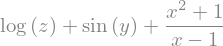

In [6]:
f= (x**2+1)/(x-1) + sp.sin(y)+sp.log(z)
f

### Substituição

In [8]:
f.subs(x,1) #O output quer dizer infinito

In [9]:
sp.sqrt(2)

In [7]:
sp.N(sp.sqrt(2))

1.41421356237310

## Plot 2D

In [8]:
from sympy.plotting import plot

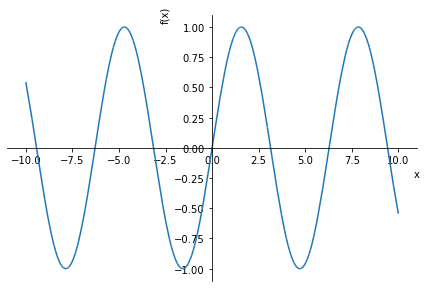

In [9]:
f=sp.sin(x)
plot(f)

Podemos delimitar os intervalo do plot

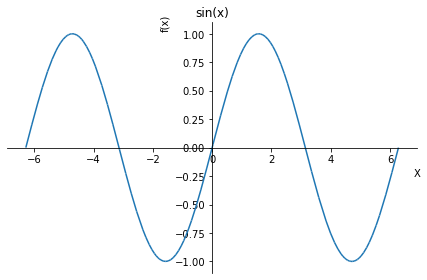

In [10]:
plot(f, (x,-2*sp.pi, 2*sp.pi), title = 'sin(x)', xlabel = "X")

Podemos plotar varias funções no mesmo intervalo

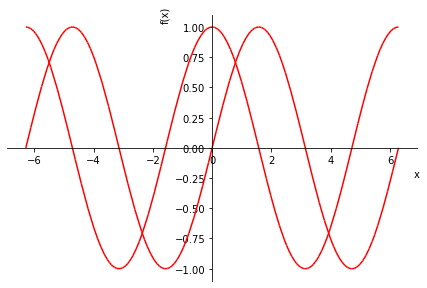

In [11]:
plot(sp.sin(x), sp.cos(x), (x,-2*sp.pi, 2*sp.pi),line_color='red')

Cada plot pode ter seu intervalo

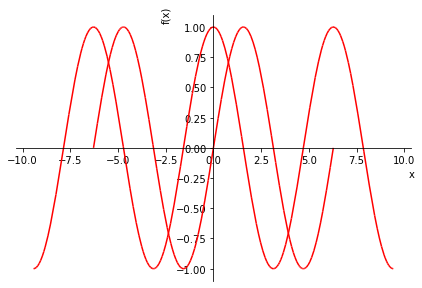

In [12]:
plot((sp.sin(x),(x,-2*sp.pi, 2*sp.pi)), (sp.cos(x), (x,-3*sp.pi, 3*sp.pi)),line_color='red')

Para que cada plot tenha uma cor difernte temos que fazer o seguinte

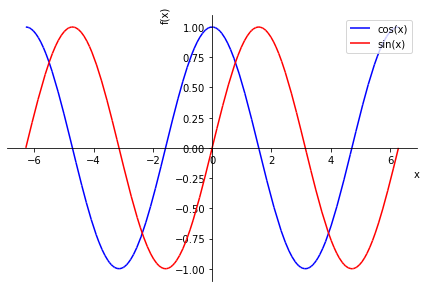

In [13]:
p1 = plot(sp.sin(x), (x,-2*sp.pi, 2*sp.pi), line_color = 'red', show = False, legend = True)
p2 = plot(sp.cos(x), (x,-2*sp.pi, 2*sp.pi), line_color = 'blue',show= False, legend = True)
p2.extend(p1)
p2.show()

## Plot 3D

In [19]:
from sympy.plotting import plot3d
%matplotlib auto 
#inline auto

Using matplotlib backend: Qt5Agg


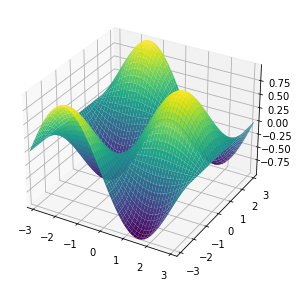

In [21]:
plot3d(sp.sin(x) * sp.cos(y), (x,-sp.pi, sp.pi),(y,-sp.pi, sp.pi))

### Outros plots

No total, o modulo `sympy.plotting` tem as seguintes funções de plot

- plot: Plots 2D line plots.

- plot_parametric: Plots 2D parametric plots.

- plot_implicit: Plots 2D implicit and region plots.

- plot3d: Plots 3D plots of functions in two variables.

- plot3d_parametric_line: Plots 3D line plots, defined by a parameter.

- plot3d_parametric_surface: Plots 3D parametric surface plots.

Podem consultar a documentação no [Plotting](https://docs.sympy.org/latest/modules/plotting.html)

## Algumas funções

Para definir uma integral

In [18]:
sp.Integral((x**2+1)/(x-1)) #Imprima bonito qualquer coisa!

Integral((x**2 + 1)/(x - 1), x)

Para definir uma matriz

In [0]:
matriz= Matrix(((1,1,1),(1,1,2),(2,1,-1)))
pprint(matriz)

⎡1  1  1 ⎤
⎢        ⎥
⎢1  1  2 ⎥
⎢        ⎥
⎣2  1  -1⎦


## Simplificação

O sympy conhece muitas identidades para simplicar as expressões matematicas. 

In [33]:
f=sp.sin(x)**2 + sp.cos(x)**2
f

Agora esse `f` é um objeto e tem varios metodos que podemos aplicar nele. 

In [34]:
f.simplify()

In [35]:
f.trigsimp() #Mesma coisa mas focada mais em trigonométricas.

In [38]:
f= x**3-x**2+x-1
f.simplify()

Podemos fatorizar o polinomial

In [37]:
f.factor()

Ou colocar uma variavel em evidencia

In [41]:
a, b=sp.symbols('a b')

sp.collect(a*x**2+b*x**2+a*x-b*x,x) #Evidência

Tem uma função do subdominio da `simplify` mas só para cortar os fatores comuns no numerador e denominador

In [0]:
cancel(x**2/x) #Comando mais dedicado a cancelar num e den. Simplify da no mesmo.

x

Outra função do subdominio da `simplify` para simplificar a potencia de uma expressão

In [43]:
sp.powsimp(x**a*x**b,)

Para combinar os logaritmos

In [45]:
sp.logcombine(a*sp.log(x),force=True) #Argumento force em todos pode dar problemas quando mistura com
                                #números imaginários, cuidado se isso existir.

## Algumas operações

Para expandir uma expressão que tem potencia

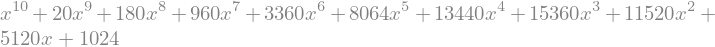

In [47]:
f=(x+2)**10
f.expand()

A função acima não expande as expressões trigonometrica, 

In [50]:
f= sp.sin(x+a)         #Veja que aqui deu diferença, ele serve para
f.expand()  #trigonométricas e só funciona antes do objeto

Para as expressões trigonometricas temos

In [51]:
sp.expand_trig(f) #<---

Para dividir uma epressão nas frações simples

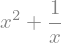

In [54]:
sp.apart((x**3 + 1)/x)

A famosa decomposição de frações parciais, boa pra integrar depois, lembra?

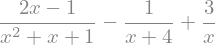

In [55]:

f=(4*x**3+21*x**2+10*x+12)/(x**4+5*x**3+5*x**2+4*x)
f.apart()

### Potências e logs

Algumas subfunções da `expand`

In [56]:
sp.expand_power_exp(x**(a+b))

In [61]:
sp.expand_log(sp.log(x**2),force=True)

O binomial é definido via

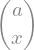

In [63]:
f=sp.binomial(a,x)
f

Para calcular a função em um ponto especifico, temos que substituir a variavel simbolica por um numero

In [66]:
f = sp.sin(x)*sp.cos(y)
f

In [67]:
f.subs(x,sp.pi/2)

In [68]:
f.subs(x,sp.pi/2).subs(y,sp.pi) #para substituir os dois valores

## Cálculo

### Derivadas

Para calcular a derivada de uma função temos duas opções

In [69]:
f=sp.cos(x*y)
df=sp.diff(f,x)
df

Ou

In [70]:
f.diff(x)

A segunda derivada é calculada via

In [72]:
sp.diff(f,x,2) #Número de derivadas, deu o mesmo.
            #Apenas mude o símbolo para derivar em outra variável.

In [73]:
f.diff(x,2)

Ou a derivada em relação das duas variaveis

In [74]:
f.diff(x,y)

### Integrais

A integração definida é 

In [77]:
df= sp.exp(-x)
sp.integrate(df,(x,0,sp.oo)) #infinito é dois ós

E indefinida 

In [80]:
sp.integrate(df,x) #Integral indefinida

E a integral dupla

In [82]:
#Aqui é uma integral do tipo SS ... dxdy 
sp.integrate(sp.exp(-x**2-a**2),(x,-sp.oo,sp.oo),(a,-sp.oo,sp.oo))

### Limite

In [85]:
sp.limit(sp.sin(x)/x, x, 0)

E os limites direcionais

In [86]:
#Diferença de lados positivos e negativos
sp.limit(1/x,x,0,'+')


In [88]:
sp.limit(1/x,x,0,'-')

# Solvers

Primeiro temos que construir uma igualidade para depois resolver

In [91]:
#Construindo equação, algo = a algo
equ = sp.Eq(x**2,1) #x^2 =1
equ

In [92]:
sp.solveset(equ,x) #Todas as soluções possíveis

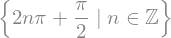

In [94]:
sp.solveset(sp.sin(x)-1,x) #Ciclo de soluções!

### Sistema de equações lineares

Aqui queremos resolver uma um sistema linear com tres equações e tres incognitas

$$
\begin{cases}
x+y+z = 1 \\
x+y+2z = 3 \\
2x+y-z = 10
\end{cases}
$$

Primeiro temos que trandformar as equações em formato $f(x,y,z)=0$

$$
\begin{cases}
x+y+z - 1 =  \\
x+y+2z - 3 = 0 \\
2x+y-z - 10 = 0
\end{cases}
$$
Aí, podemos passar para o `sympy` dentro de uma lista

In [105]:
#Isole a equação para igualar a zero, escreva
sp.linsolve([x+y+z-1,x+y+2*z-3,2*x+y-z-10],(x,y,z))

Um caso de solução impossível

In [106]:

sp.linsolve((x+y+z-1,x+y+2*z-3,x+y-z-5),(x,y,z))

Também te dá caso seja indeterminado, fica em função de variavel

In [107]:
sp.linsolve([x+y+z-1,x+y+2*z-3],(x,y,z))

### Sistema de equações não lineares

In [108]:
sp.nonlinsolve((x**2-1,y**2-1),(x,y))

Em vez de todas as funções acima podiamos usar a função `solve`. Só o output é um pouco diferente

In [109]:
sp.solve((x**2-1,y**2-1),(x,y))

In [110]:
sp.solve([x+y+z-1,x+y+2*z-3],(x,y,z))

In [112]:
sp.solve([x+y+z-1,x+y+2*z-3,2*x+y-z-10],(x,y,z))